# Pymaceuticals Inc.
---

### Analysis

- of the 4 drugs we conducted further reazserach on there were 2 stand outs capomulin and ramicane performed signifhcantly better then thier counter parts

- ibonoful had the largest varaince in out come. it had an outlier that performed well to treatment and reduced the tumor size

- there is a strong corelation between weight of the mouse and tumor size. this makes sense because mice are so mall that if they have any large tumors it will be noticable weight diffrence for them. 

 

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import numpy as np
from sklearn.linear_model import LinearRegression

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = study_results.merge(mouse_metadata,on = 'Mouse ID', how = "left")

# Display the data table for preview
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
mice_count = combined_df ['Mouse ID'].nunique()
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = combined_df[combined_df.duplicated(subset = ['Mouse ID','Timepoint'], keep = False)]
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_df[combined_df['Mouse ID'] =='g989']
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop(combined_df[combined_df['Mouse ID'] == 'g989'].index)
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_volume = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
mean_tumor = tumor_volume.mean()
median_tumor = tumor_volume.median()
var_tumor = tumor_volume.var()
stdev_tumor = tumor_volume.std()
sem_tumor = tumor_volume.sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_summary_df = pd.DataFrame({
    'Drug Regimen': mean_tumor.index,
    'Mean tumor Volume': mean_tumor,
    'Median Tumor Volume': median_tumor,
    'tumor Volume Variance': var_tumor,
    'tumor Volume Std. Dev':stdev_tumor,
    'Tumor volume Std. Err':sem_tumor
    
    
})
# Assemble the resulting series into a single summary DataFrame.
tumor_summary_df = tumor_summary_df.set_index('Drug Regimen')
tumor_summary_df

,Mean tumor Volume,Median Tumor Volume,tumor Volume Variance,tumor Volume Std. Dev,Tumor volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
tumor_summary_agg = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

# Using the aggregation method, produce the same summary statistics in a single line
tumor_summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

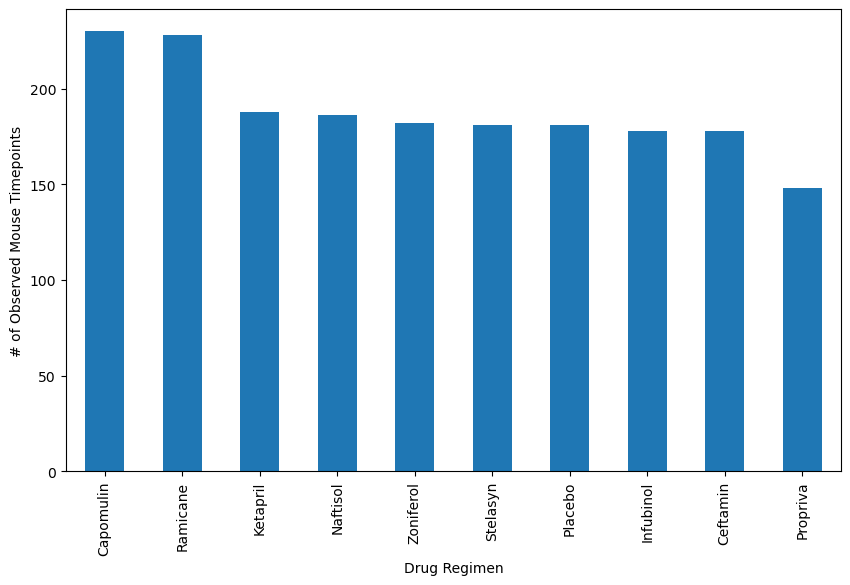

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_count = clean_df ['Drug Regimen'].value_counts()
regimen_count
plt.figure(figsize=(10,6))
regimen_count.plot(kind = 'bar')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

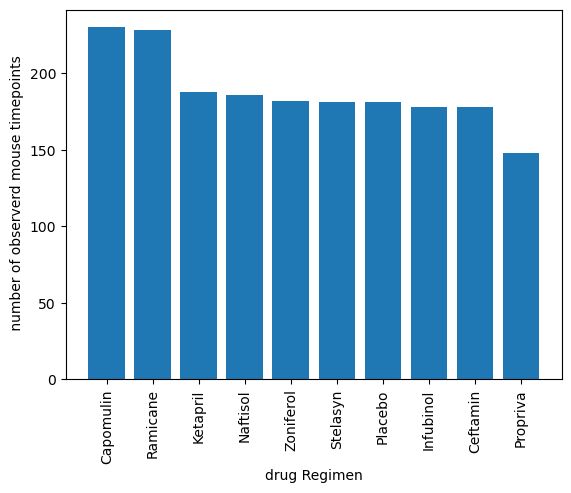

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_values = regimen_count.index
y_values = regimen_count.values

plt.bar(x_values,y_values)
plt.xlabel("drug Regimen")
plt.ylabel (' number of observerd mouse timepoints')
plt.xticks(rotation = 90)
plt.show

<Axes: ylabel='Mouse ID'>

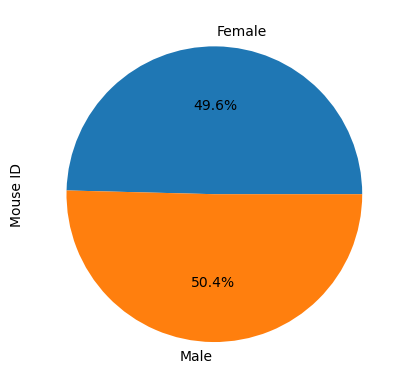

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Panda
num_mouse_sex= clean_df.groupby("Sex")["Mouse ID"].nunique()

num_mouse_sex.plot(kind = 'pie', autopct = '%1.1f%%')

<function matplotlib.pyplot.show(close=None, block=None)>

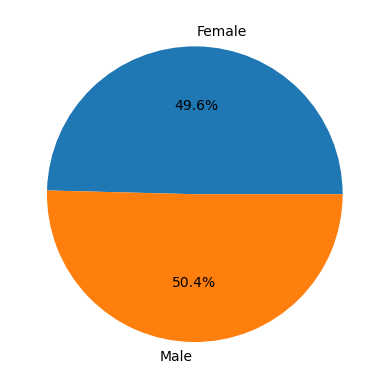

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
num_mouse_sex= clean_df.groupby("Sex")["Mouse ID"].nunique()
labels = ['Female', 'Male']
sizes = num_mouse_sex.values
plt.pie(sizes,labels=labels,autopct = '%1.1f%%')
plt.show

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin', 'Ramicane',' Infubinol',' Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = clean_df.groupby('Mouse ID')["Timepoint"].max()
max_timepoints

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_df = clean_df.merge(max_timepoints, on=['Mouse ID','Timepoint'], how = 'right')
final_tumor_df = final_tumor_df.set_index('Mouse ID')
final_tumor_df

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
a203,45,67.973419,2,Infubinol,Female,20,23
a251,45,65.525743,1,Infubinol,Female,21,25
a262,45,70.717621,4,Placebo,Female,17,29
a275,45,62.999356,3,Ceftamin,Female,20,28
a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...
z435,10,48.710661,0,Propriva,Female,12,26
z578,45,30.638696,0,Ramicane,Male,11,16
z581,45,62.754451,3,Infubinol,Female,24,25


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane',' Infubinol',' Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# # Calculate the IQR and quantitatively determine if there are any potential outliers. 

Q1 = final_tumor_df['Tumor Volume (mm3)'].quantile(0.25)
Q3 = final_tumor_df['Tumor Volume (mm3)'].quantile(0.75)
IQR = Q3 - Q1
IQR
    # Locate the rows which contain mice on each drug and get the tumor volumes
treatment_df = pd.DataFrame(final_tumor_df.apply(lambda row: row[final_tumor_df['Drug Regimen'].isin(['Capomulin', 'Ramicane','Infubinol','Ceftamin'])]))
treatment_vol_df=treatment_df.loc[:,['Tumor Volume (mm3)','Drug Regimen']]
    # add subset 

    
    # Determine outliers using upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = treatment_df[(treatment_vol_df['Tumor Volume (mm3)'] < lower_bound) | (treatment_df['Tumor Volume (mm3)'] > upper_bound)]

treatment_vol_df

,Tumor Volume (mm3),Drug Regimen
Mouse ID,,
a203,67.973419,Infubinol
a251,65.525743,Infubinol
a275,62.999356,Ceftamin
a411,38.407618,Ramicane
a444,43.047543,Ramicane
...,...,...
y769,68.594745,Ceftamin
y793,31.896238,Capomulin
y865,64.729837,Ceftamin


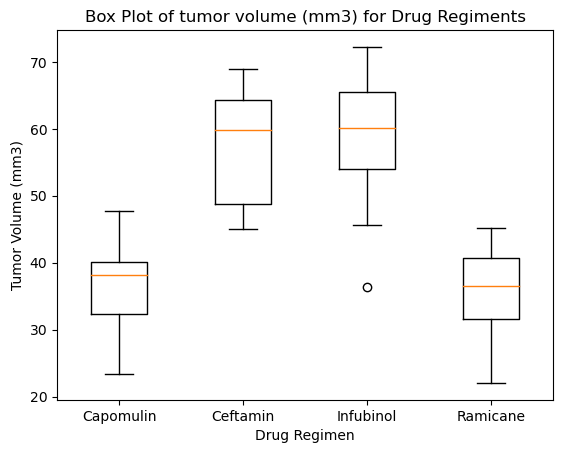

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
grouped_data = treatment_vol_df.groupby('Drug Regimen')
grouped_values = [group['Tumor Volume (mm3)'].tolist() for name, group in grouped_data]

plt.boxplot(grouped_values, labels=grouped_data.groups.keys())
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Box Plot of tumor volume (mm3) for Drug Regiments')
plt.show()

## Line and Scatter Plots

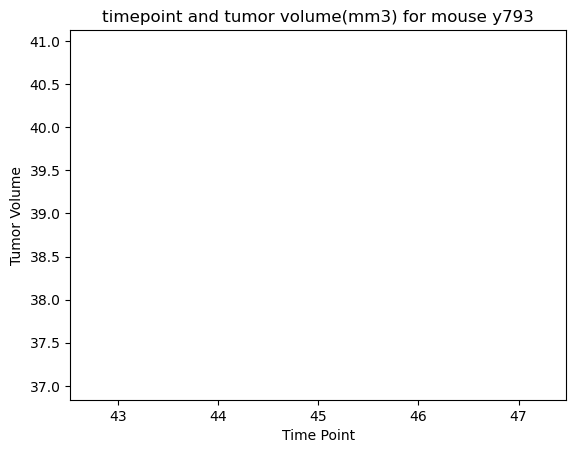

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
df_reset = final_tumor_df.reset_index()
# mouse_df = df_reset[df_reset['Drug Regimen'] == 'Capomulin']
mouse_df = df_reset[df_reset['Mouse ID'] == 'b128']

plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'])
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume')
plt.title("timepoint and tumor volume(mm3) for mouse y793")
plt.show()

# Every mouse I have looked up that was on calpomulin only had 1 timepoint

Text(0.5, 1.0, 'tumor volume vs weight for Capmulin')

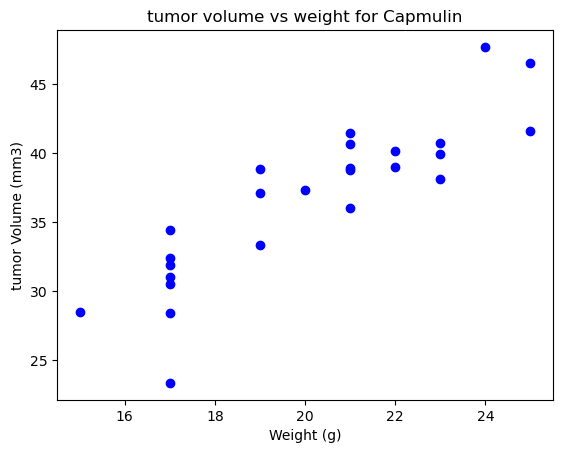

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_df = df_reset[df_reset['Drug Regimen'] == 'Capomulin']

weight_df = cap_df['Weight (g)']
tum_vol = cap_df['Tumor Volume (mm3)']


plt.scatter(weight_df, tum_vol, label='Data Points', color='blue', marker='o')

# Add labels and a title
plt.xlabel('Weight (g)')
plt.ylabel('tumor Volume (mm3)')
plt.title('tumor volume vs weight for Capmulin')


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is PearsonRResult(statistic=0.8767060403658116, pvalue=9.084429088673465e-09)


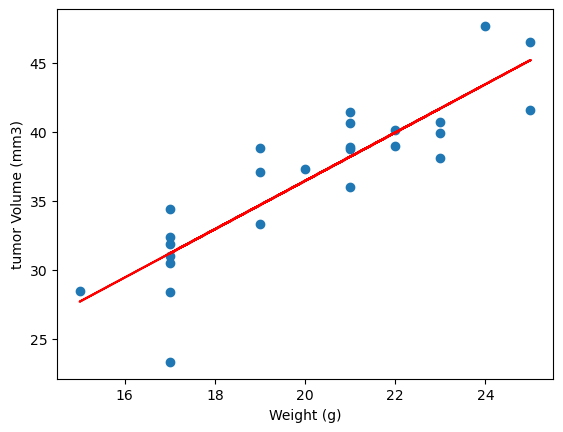

In [26]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation_coefficient = pearsonr(cap_df['Weight (g)'],cap_df['Tumor Volume (mm3)'])

print(f'The correlation between mouse weight and the average tumor volume is {correlation_coefficient}')




x_values = cap_df['Weight (g)']
y_values = cap_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('tumor Volume (mm3)')
plt.show()


